In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from globalVariables import *
import simpleCNNwithInception as inceptionCNN
import simpleCNN as simpleCNN
import simpleCNNwithInceptionRegression as regressor
from keras.callbacks import CSVLogger
from scipy.ndimage import rotate
from tools import plot_confusion_matrix
from getSIDMdata_generator import get_tf_DataSet as getGenerators
import scienceplots
plt.style.use(["science", "grid"])

Objectives
----------
1. To see if the model can tell between baryonic feedback and dark matter ineractions


Conclusions
-----------
1. Xray really deciphers between baryonic models and total and stellar dark matter models
2. Generators with an refelect and interpolation order of 3 do well
3. Xray means that we can descern between CDM, but because CDM and SIDM have the same AGN then it is difficult to separte those out.


In [ ]:
def predict( test_set, list_of_models ):
    
    predictions = None
    for iL, iModel in enumerate(list_of_models):
        
        if predictions is None:
            predictions = np.argmax(iModel.predict( test_set, verbose=0 ), axis=-1)
        else:
            new_predict = np.argmax(iModel.predict( test_set, verbose=0 ), axis=-1)
            predictions[ predictions == iL ] += new_predict[ predictions == iL]
    return predictions

In [ ]:
epochs=80
random_state=42
model_name='simple'

In [ ]:
def get_best_model( image_generator, test_set, model_name='Inception', checkpoint_filepath="models" ):
    
    if os.path.isdir(checkpoint_filepath):
        print("Found Model")
        return tf.keras.models.load_model(checkpoint_filepath)
        
        
    num_classes = len(np.unique(test_set[1]))
    
    if model_name.lower() == 'simple':
        model = simpleCNN.getModel_ds(num_classes)
    elif model_name.lower() == 'dibare':
        model = mertens.DIBARE(input_shape=test_set[0][0].shape, classes=num_classes, bn_momentum=.0, 
                                FC1=0,FC2=0,feature_dropout=.33,num_layersA=1,num_layersB=1,num_layersC=1,leak=.03)
    elif model_name.lower() == 'inception':
        model = mertens.InceptionV4(input_shape=test_set[0][0].shape, bn_momentum=.0,classes=num_classes,
                                               feature_dropout=.33,num_layersA=1,num_layersB=1,num_layersC=1,leak=.03)

    else:
        raise ValueError("Model name not recognised")
    
    optimizer = tf.keras.optimizers.Adam( learning_rate=1e-3 ) 
    model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True)
    
    
    history = model.fit(
      x=image_generator,
      validation_data=test_set,
      epochs=epochs, verbose=1, callbacks=[model_checkpoint_callback])
    
    return model

#### 1. Get the fiducial for total and stellar for CDM fiducial and DM (fiducial_model)

In [34]:
train, test = getGenerators(augment_data=True, simulationNames=['CDM','SIDM0.1','SIDM1'], 
                                                      channels=['total','stellar'], 
                                                      allDataFile='pickles/binned_data_20.pkl')
checkpoint_filepath = 'models/test_baryon/%s_cdmfid_0p1_1_tot_ste_%i' % (model_name, random_state)

num_classes = len(np.unique(test[1]))
fiducial_model = get_best_model( train, test, model_name=model_name, checkpoint_filepath=checkpoint_filepath)

/Users/davidharvey/Work/darkCNN/lib/python3.10/site-packages/keras/preprocessing/image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (2880, 100, 100, 2) (2 channels).
  warnings.warn(


Epoch 1/80
90/90 [==============================] - ETA: 0s - loss: 0.9484 - accuracy: 0.5000

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 21s 225ms/step - loss: 0.9484 - accuracy: 0.5000 - val_loss: 0.8107 - val_accuracy: 0.5792
Epoch 2/80
90/90 [==============================] - ETA: 0s - loss: 0.8234 - accuracy: 0.5910

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 19s 213ms/step - loss: 0.8234 - accuracy: 0.5910 - val_loss: 0.7491 - val_accuracy: 0.6167
Epoch 3/80
90/90 [==============================] - ETA: 0s - loss: 0.7208 - accuracy: 0.6417

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 19s 213ms/step - loss: 0.7208 - accuracy: 0.6417 - val_loss: 0.6589 - val_accuracy: 0.6653
Epoch 4/80
90/90 [==============================] - ETA: 0s - loss: 0.6665 - accuracy: 0.6736

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 17s 193ms/step - loss: 0.6665 - accuracy: 0.6736 - val_loss: 0.6461 - val_accuracy: 0.6847
Epoch 5/80
90/90 [==============================] - ETA: 0s - loss: 0.6434 - accuracy: 0.6927

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 15s 167ms/step - loss: 0.6434 - accuracy: 0.6927 - val_loss: 0.6125 - val_accuracy: 0.6861
Epoch 6/80
90/90 [==============================] - ETA: 0s - loss: 0.6233 - accuracy: 0.6958

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 14s 161ms/step - loss: 0.6233 - accuracy: 0.6958 - val_loss: 0.5978 - val_accuracy: 0.7278
Epoch 7/80
90/90 [==============================] - 15s 165ms/step - loss: 0.6105 - accuracy: 0.7052 - val_loss: 0.5898 - val_accuracy: 0.7181
Epoch 8/80
90/90 [==============================] - ETA: 0s - loss: 0.6021 - accuracy: 0.7118

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 19s 210ms/step - loss: 0.6021 - accuracy: 0.7118 - val_loss: 0.5802 - val_accuracy: 0.7417
Epoch 9/80
90/90 [==============================] - 16s 175ms/step - loss: 0.5840 - accuracy: 0.7167 - val_loss: 0.5759 - val_accuracy: 0.7264
Epoch 10/80
90/90 [==============================] - 15s 163ms/step - loss: 0.5929 - accuracy: 0.7156 - val_loss: 0.6824 - val_accuracy: 0.6556
Epoch 11/80
90/90 [==============================] - 15s 169ms/step - loss: 0.5965 - accuracy: 0.7188 - val_loss: 0.6071 - val_accuracy: 0.7153
Epoch 12/80
90/90 [==============================] - ETA: 0s - loss: 0.5719 - accuracy: 0.7302

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 18s 197ms/step - loss: 0.5719 - accuracy: 0.7302 - val_loss: 0.5549 - val_accuracy: 0.7472
Epoch 13/80
90/90 [==============================] - 17s 185ms/step - loss: 0.5461 - accuracy: 0.7483 - val_loss: 0.5760 - val_accuracy: 0.7278
Epoch 14/80
90/90 [==============================] - 15s 166ms/step - loss: 0.5465 - accuracy: 0.7365 - val_loss: 0.5748 - val_accuracy: 0.7417
Epoch 15/80
90/90 [==============================] - 15s 170ms/step - loss: 0.5372 - accuracy: 0.7427 - val_loss: 0.5350 - val_accuracy: 0.7472
Epoch 16/80
90/90 [==============================] - ETA: 0s - loss: 0.5304 - accuracy: 0.7486

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 19s 213ms/step - loss: 0.5304 - accuracy: 0.7486 - val_loss: 0.5410 - val_accuracy: 0.7542
Epoch 17/80
90/90 [==============================] - ETA: 0s - loss: 0.5366 - accuracy: 0.7542

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 19s 215ms/step - loss: 0.5366 - accuracy: 0.7542 - val_loss: 0.5343 - val_accuracy: 0.7597
Epoch 18/80
90/90 [==============================] - 15s 167ms/step - loss: 0.5328 - accuracy: 0.7437 - val_loss: 0.5415 - val_accuracy: 0.7528
Epoch 19/80
90/90 [==============================] - 16s 180ms/step - loss: 0.5219 - accuracy: 0.7576 - val_loss: 0.5577 - val_accuracy: 0.7556
Epoch 20/80
90/90 [==============================] - ETA: 0s - loss: 0.5282 - accuracy: 0.7531

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 19s 208ms/step - loss: 0.5282 - accuracy: 0.7531 - val_loss: 0.5214 - val_accuracy: 0.7625
Epoch 21/80
90/90 [==============================] - 15s 165ms/step - loss: 0.5185 - accuracy: 0.7545 - val_loss: 0.5536 - val_accuracy: 0.7347
Epoch 22/80
90/90 [==============================] - 15s 170ms/step - loss: 0.5223 - accuracy: 0.7549 - val_loss: 0.5791 - val_accuracy: 0.7319
Epoch 23/80
90/90 [==============================] - 15s 164ms/step - loss: 0.5174 - accuracy: 0.7608 - val_loss: 0.5236 - val_accuracy: 0.7625
Epoch 24/80
90/90 [==============================] - 15s 163ms/step - loss: 0.5106 - accuracy: 0.7594 - val_loss: 0.5405 - val_accuracy: 0.7417
Epoch 25/80
90/90 [==============================] - ETA: 0s - loss: 0.4974 - accuracy: 0.7677

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 18s 201ms/step - loss: 0.4974 - accuracy: 0.7677 - val_loss: 0.5185 - val_accuracy: 0.7736
Epoch 26/80
90/90 [==============================] - 14s 158ms/step - loss: 0.5088 - accuracy: 0.7632 - val_loss: 0.5387 - val_accuracy: 0.7583
Epoch 27/80
90/90 [==============================] - 16s 174ms/step - loss: 0.5078 - accuracy: 0.7639 - val_loss: 0.5237 - val_accuracy: 0.7569
Epoch 28/80
90/90 [==============================] - 16s 172ms/step - loss: 0.5077 - accuracy: 0.7611 - val_loss: 0.5319 - val_accuracy: 0.7500
Epoch 29/80
90/90 [==============================] - 17s 187ms/step - loss: 0.4986 - accuracy: 0.7722 - val_loss: 0.5033 - val_accuracy: 0.7681
Epoch 30/80
90/90 [==============================] - 16s 176ms/step - loss: 0.5020 - accuracy: 0.7611 - val_loss: 0.5101 - val_accuracy: 0.7694
Epoch 31/80
90/90 [==============================] - 17s 185ms/step - loss: 0.5021 - accuracy: 0.7583 - val_loss: 0.5709 - val_accuracy: 0.7444
Epoc

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 19s 208ms/step - loss: 0.4782 - accuracy: 0.7694 - val_loss: 0.5056 - val_accuracy: 0.7750
Epoch 38/80
90/90 [==============================] - 15s 166ms/step - loss: 0.4837 - accuracy: 0.7708 - val_loss: 0.5005 - val_accuracy: 0.7750
Epoch 39/80
90/90 [==============================] - ETA: 0s - loss: 0.4751 - accuracy: 0.7764

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 15s 168ms/step - loss: 0.4751 - accuracy: 0.7764 - val_loss: 0.4904 - val_accuracy: 0.7792
Epoch 40/80
90/90 [==============================] - 12s 133ms/step - loss: 0.4746 - accuracy: 0.7740 - val_loss: 0.5592 - val_accuracy: 0.7292
Epoch 41/80
90/90 [==============================] - 12s 128ms/step - loss: 0.4835 - accuracy: 0.7708 - val_loss: 0.5337 - val_accuracy: 0.7597
Epoch 42/80
90/90 [==============================] - 12s 128ms/step - loss: 0.4670 - accuracy: 0.7823 - val_loss: 0.5071 - val_accuracy: 0.7667
Epoch 43/80
90/90 [==============================] - 12s 133ms/step - loss: 0.4658 - accuracy: 0.7868 - val_loss: 0.5857 - val_accuracy: 0.7208
Epoch 44/80
90/90 [==============================] - 12s 136ms/step - loss: 0.4671 - accuracy: 0.7733 - val_loss: 0.5178 - val_accuracy: 0.7667
Epoch 45/80
90/90 [==============================] - 12s 133ms/step - loss: 0.4668 - accuracy: 0.7847 - val_loss: 0.5275 - val_accuracy: 0.7472
Epoc

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 13s 148ms/step - loss: 0.4543 - accuracy: 0.7924 - val_loss: 0.4871 - val_accuracy: 0.7861
Epoch 48/80
90/90 [==============================] - ETA: 0s - loss: 0.4681 - accuracy: 0.7792

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 11s 118ms/step - loss: 0.4681 - accuracy: 0.7792 - val_loss: 0.5008 - val_accuracy: 0.7875
Epoch 49/80
90/90 [==============================] - 9s 102ms/step - loss: 0.4496 - accuracy: 0.7868 - val_loss: 0.4820 - val_accuracy: 0.7819
Epoch 50/80
90/90 [==============================] - 9s 102ms/step - loss: 0.4477 - accuracy: 0.7889 - val_loss: 0.5087 - val_accuracy: 0.7778
Epoch 51/80
90/90 [==============================] - 10s 106ms/step - loss: 0.4693 - accuracy: 0.7851 - val_loss: 0.4850 - val_accuracy: 0.7847
Epoch 52/80
90/90 [==============================] - 9s 105ms/step - loss: 0.4552 - accuracy: 0.7878 - val_loss: 0.4954 - val_accuracy: 0.7583
Epoch 53/80
90/90 [==============================] - 10s 111ms/step - loss: 0.4626 - accuracy: 0.7875 - val_loss: 0.5025 - val_accuracy: 0.7569
Epoch 54/80
90/90 [==============================] - 9s 104ms/step - loss: 0.4549 - accuracy: 0.7951 - val_loss: 0.4690 - val_accuracy: 0.7722
Epoch 55

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 11s 120ms/step - loss: 0.4513 - accuracy: 0.7840 - val_loss: 0.4660 - val_accuracy: 0.7889
Epoch 58/80
90/90 [==============================] - 9s 105ms/step - loss: 0.4499 - accuracy: 0.7847 - val_loss: 0.4987 - val_accuracy: 0.7708
Epoch 59/80
90/90 [==============================] - 10s 105ms/step - loss: 0.4399 - accuracy: 0.8003 - val_loss: 0.5048 - val_accuracy: 0.7667
Epoch 60/80
90/90 [==============================] - 9s 104ms/step - loss: 0.4278 - accuracy: 0.8024 - val_loss: 0.4934 - val_accuracy: 0.7722
Epoch 61/80
90/90 [==============================] - 9s 102ms/step - loss: 0.4309 - accuracy: 0.8010 - val_loss: 0.4766 - val_accuracy: 0.7792
Epoch 62/80
90/90 [==============================] - 9s 103ms/step - loss: 0.4398 - accuracy: 0.8038 - val_loss: 0.4837 - val_accuracy: 0.7792
Epoch 63/80
90/90 [==============================] - 9s 103ms/step - loss: 0.4221 - accuracy: 0.8069 - val_loss: 0.4855 - val_accuracy: 0.7750
Epoch 64/

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 10s 115ms/step - loss: 0.4556 - accuracy: 0.7868 - val_loss: 0.4735 - val_accuracy: 0.8014
Epoch 65/80
90/90 [==============================] - 9s 103ms/step - loss: 0.4285 - accuracy: 0.7951 - val_loss: 0.4925 - val_accuracy: 0.7778
Epoch 66/80
90/90 [==============================] - 9s 102ms/step - loss: 0.4276 - accuracy: 0.7920 - val_loss: 0.4971 - val_accuracy: 0.7694
Epoch 67/80
90/90 [==============================] - 9s 102ms/step - loss: 0.4348 - accuracy: 0.8014 - val_loss: 0.4811 - val_accuracy: 0.7917
Epoch 68/80
90/90 [==============================] - 9s 105ms/step - loss: 0.4229 - accuracy: 0.8000 - val_loss: 0.4854 - val_accuracy: 0.7833
Epoch 69/80
90/90 [==============================] - 9s 101ms/step - loss: 0.4197 - accuracy: 0.8035 - val_loss: 0.4890 - val_accuracy: 0.7736
Epoch 70/80
90/90 [==============================] - 10s 105ms/step - loss: 0.4226 - accuracy: 0.7997 - val_loss: 0.4908 - val_accuracy: 0.7764
Epoch 71/

In [ ]:
y_pred = predict( test[0], [fiducial_model] )
plot_confusion_matrix( test[1], y_pred)

#### 2. Get the fiducial for total and stellar for CDM fiducial, hi and low and DM (all_cdm_plus_dm )

In [35]:
train, test = getGenerators(augment_data=True, simulationNames=['CDM_low','CDM','CDM_hi','SIDM0.1','SIDM1'], 
                                                      channels=['total','stellar'], 
                                                      allDataFile='pickles/binned_data_20.pkl')

checkpoint_filepath = 'models/test_baryon/%s_cdmall_0p1_1_tot_ste_%i' % (model_name, random_state)


all_cdm_plus_dm = get_best_model( train, test, model_name=model_name, checkpoint_filepath=checkpoint_filepath)



/Users/davidharvey/Work/darkCNN/lib/python3.10/site-packages/keras/preprocessing/image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (4800, 100, 100, 2) (2 channels).
  warnings.warn(


Epoch 1/80
150/150 [==============================] - ETA: 0s - loss: 1.4579 - accuracy: 0.3310

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


150/150 [==============================] - 18s 115ms/step - loss: 1.4579 - accuracy: 0.3310 - val_loss: 1.4041 - val_accuracy: 0.3750
Epoch 2/80
150/150 [==============================] - ETA: 0s - loss: 1.2903 - accuracy: 0.3998

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


150/150 [==============================] - 17s 111ms/step - loss: 1.2903 - accuracy: 0.3998 - val_loss: 1.2693 - val_accuracy: 0.3817
Epoch 3/80
150/150 [==============================] - ETA: 0s - loss: 1.2295 - accuracy: 0.4212

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


150/150 [==============================] - 14s 95ms/step - loss: 1.2295 - accuracy: 0.4212 - val_loss: 1.2634 - val_accuracy: 0.4050
Epoch 4/80
150/150 [==============================] - ETA: 0s - loss: 1.1965 - accuracy: 0.4400

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


150/150 [==============================] - 17s 114ms/step - loss: 1.1965 - accuracy: 0.4400 - val_loss: 1.1813 - val_accuracy: 0.4333
Epoch 5/80
150/150 [==============================] - ETA: 0s - loss: 1.1683 - accuracy: 0.4508

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


150/150 [==============================] - 17s 115ms/step - loss: 1.1683 - accuracy: 0.4508 - val_loss: 1.1793 - val_accuracy: 0.4475
Epoch 6/80
150/150 [==============================] - 12s 81ms/step - loss: 1.1566 - accuracy: 0.4640 - val_loss: 1.1716 - val_accuracy: 0.4442
Epoch 7/80
150/150 [==============================] - ETA: 0s - loss: 1.1566 - accuracy: 0.4590

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


150/150 [==============================] - 15s 103ms/step - loss: 1.1566 - accuracy: 0.4590 - val_loss: 1.1641 - val_accuracy: 0.4542
Epoch 8/80
150/150 [==============================] - 16s 104ms/step - loss: 1.1410 - accuracy: 0.4629 - val_loss: 1.1670 - val_accuracy: 0.4225
Epoch 9/80
150/150 [==============================] - ETA: 0s - loss: 1.1340 - accuracy: 0.4688

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


150/150 [==============================] - 16s 104ms/step - loss: 1.1340 - accuracy: 0.4688 - val_loss: 1.1649 - val_accuracy: 0.4633
Epoch 10/80
150/150 [==============================] - 12s 80ms/step - loss: 1.1329 - accuracy: 0.4779 - val_loss: 1.1883 - val_accuracy: 0.4375
Epoch 11/80
150/150 [==============================] - 15s 103ms/step - loss: 1.1196 - accuracy: 0.4683 - val_loss: 1.1292 - val_accuracy: 0.4592
Epoch 12/80
150/150 [==============================] - 15s 102ms/step - loss: 1.1140 - accuracy: 0.4794 - val_loss: 1.2191 - val_accuracy: 0.4508
Epoch 13/80
150/150 [==============================] - ETA: 0s - loss: 1.1053 - accuracy: 0.4852

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


150/150 [==============================] - 14s 94ms/step - loss: 1.1053 - accuracy: 0.4852 - val_loss: 1.1292 - val_accuracy: 0.4867
Epoch 14/80
150/150 [==============================] - ETA: 0s - loss: 1.1011 - accuracy: 0.4885

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


150/150 [==============================] - 15s 98ms/step - loss: 1.1011 - accuracy: 0.4885 - val_loss: 1.1104 - val_accuracy: 0.4900
Epoch 15/80
150/150 [==============================] - 16s 108ms/step - loss: 1.0996 - accuracy: 0.4915 - val_loss: 1.1196 - val_accuracy: 0.4758
Epoch 16/80
150/150 [==============================] - 15s 102ms/step - loss: 1.0956 - accuracy: 0.4917 - val_loss: 1.1157 - val_accuracy: 0.4775
Epoch 17/80
150/150 [==============================] - 16s 104ms/step - loss: 1.0873 - accuracy: 0.4921 - val_loss: 1.1132 - val_accuracy: 0.4708
Epoch 18/80
150/150 [==============================] - 15s 101ms/step - loss: 1.0871 - accuracy: 0.4908 - val_loss: 1.1158 - val_accuracy: 0.4867
Epoch 19/80
150/150 [==============================] - 15s 103ms/step - loss: 1.0836 - accuracy: 0.4996 - val_loss: 1.1268 - val_accuracy: 0.4858
Epoch 20/80
150/150 [==============================] - 16s 104ms/step - loss: 1.0820 - accuracy: 0.4898 - val_loss: 1.1312 - val_accuracy

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


150/150 [==============================] - 17s 111ms/step - loss: 1.0733 - accuracy: 0.5004 - val_loss: 1.0850 - val_accuracy: 0.4950
Epoch 24/80
150/150 [==============================] - 16s 105ms/step - loss: 1.0704 - accuracy: 0.5040 - val_loss: 1.0956 - val_accuracy: 0.4850
Epoch 25/80
150/150 [==============================] - 16s 104ms/step - loss: 1.0651 - accuracy: 0.5138 - val_loss: 1.1118 - val_accuracy: 0.4800
Epoch 26/80
150/150 [==============================] - 16s 105ms/step - loss: 1.0636 - accuracy: 0.5110 - val_loss: 1.0858 - val_accuracy: 0.4950
Epoch 27/80
150/150 [==============================] - 16s 105ms/step - loss: 1.0532 - accuracy: 0.5113 - val_loss: 1.0915 - val_accuracy: 0.4775
Epoch 28/80
150/150 [==============================] - 16s 104ms/step - loss: 1.0610 - accuracy: 0.5060 - val_loss: 1.0828 - val_accuracy: 0.4925
Epoch 29/80
150/150 [==============================] - ETA: 0s - loss: 1.0529 - accuracy: 0.5138

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


150/150 [==============================] - 17s 116ms/step - loss: 1.0529 - accuracy: 0.5138 - val_loss: 1.0833 - val_accuracy: 0.5000
Epoch 30/80
150/150 [==============================] - 12s 80ms/step - loss: 1.0504 - accuracy: 0.5169 - val_loss: 1.0762 - val_accuracy: 0.4942
Epoch 31/80
150/150 [==============================] - 15s 97ms/step - loss: 1.0557 - accuracy: 0.5085 - val_loss: 1.0836 - val_accuracy: 0.4917
Epoch 32/80
150/150 [==============================] - ETA: 0s - loss: 1.0404 - accuracy: 0.5175

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


150/150 [==============================] - 17s 114ms/step - loss: 1.0404 - accuracy: 0.5175 - val_loss: 1.0667 - val_accuracy: 0.5033
Epoch 33/80
150/150 [==============================] - 16s 106ms/step - loss: 1.0401 - accuracy: 0.5208 - val_loss: 1.0758 - val_accuracy: 0.4908
Epoch 34/80
150/150 [==============================] - 16s 105ms/step - loss: 1.0416 - accuracy: 0.5177 - val_loss: 1.0854 - val_accuracy: 0.4900
Epoch 35/80
150/150 [==============================] - 16s 108ms/step - loss: 1.0387 - accuracy: 0.5217 - val_loss: 1.0891 - val_accuracy: 0.4725
Epoch 36/80
150/150 [==============================] - 17s 111ms/step - loss: 1.0289 - accuracy: 0.5225 - val_loss: 1.0914 - val_accuracy: 0.4783
Epoch 37/80
150/150 [==============================] - 16s 107ms/step - loss: 1.0367 - accuracy: 0.5196 - val_loss: 1.0925 - val_accuracy: 0.4825
Epoch 38/80
150/150 [==============================] - 15s 103ms/step - loss: 1.0350 - accuracy: 0.5227 - val_loss: 1.0948 - val_accurac

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


150/150 [==============================] - 18s 117ms/step - loss: 1.0194 - accuracy: 0.5331 - val_loss: 1.0737 - val_accuracy: 0.5150
Epoch 40/80
150/150 [==============================] - 14s 94ms/step - loss: 1.0303 - accuracy: 0.5219 - val_loss: 1.0836 - val_accuracy: 0.4917
Epoch 41/80
150/150 [==============================] - 13s 85ms/step - loss: 1.0248 - accuracy: 0.5346 - val_loss: 1.0759 - val_accuracy: 0.5033
Epoch 42/80
150/150 [==============================] - 16s 107ms/step - loss: 1.0135 - accuracy: 0.5348 - val_loss: 1.0720 - val_accuracy: 0.4883
Epoch 43/80
150/150 [==============================] - 16s 108ms/step - loss: 1.0243 - accuracy: 0.5325 - val_loss: 1.0851 - val_accuracy: 0.4925
Epoch 44/80
150/150 [==============================] - 16s 106ms/step - loss: 1.0047 - accuracy: 0.5433 - val_loss: 1.0793 - val_accuracy: 0.5058
Epoch 45/80
150/150 [==============================] - 16s 109ms/step - loss: 1.0132 - accuracy: 0.5371 - val_loss: 1.0587 - val_accuracy:

#### 3. Get the fiducial for total, xray and stellar for CDM and low fiducial and DM (all_cdm_plus_dm_3_channel)

In [60]:
train, test = getGenerators(augment_data=True, simulationNames=['CDM_low','CDM','CDM_hi','SIDM0.1','SIDM1'], 
                                                      channels=['total','stellar','xray'], 
                                                      allDataFile='pickles/binned_data_20.pkl')

checkpoint_filepath = 'models/test_baryon/%s_cdmall_0p1_1_tot_ste_xray_%i' % (model_name, random_state)


all_cdm_plus_dm_3_channels = get_best_model( train, test, model_name=model_name, checkpoint_filepath=checkpoint_filepath)





Epoch 1/80
150/150 [==============================] - ETA: 0s - loss: 1.4282 - accuracy: 0.3702

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


150/150 [==============================] - 21s 134ms/step - loss: 1.4282 - accuracy: 0.3702 - val_loss: 1.3842 - val_accuracy: 0.3933
Epoch 2/80
150/150 [==============================] - ETA: 0s - loss: 1.2658 - accuracy: 0.4529

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


150/150 [==============================] - 25s 167ms/step - loss: 1.2658 - accuracy: 0.4529 - val_loss: 1.3013 - val_accuracy: 0.4317
Epoch 3/80
150/150 [==============================] - ETA: 0s - loss: 1.1810 - accuracy: 0.5013

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


150/150 [==============================] - 26s 175ms/step - loss: 1.1810 - accuracy: 0.5013 - val_loss: 1.1848 - val_accuracy: 0.5058
Epoch 4/80
150/150 [==============================] - ETA: 0s - loss: 1.0919 - accuracy: 0.5398

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


150/150 [==============================] - 24s 163ms/step - loss: 1.0919 - accuracy: 0.5398 - val_loss: 1.0856 - val_accuracy: 0.5483
Epoch 5/80
150/150 [==============================] - ETA: 0s - loss: 1.0561 - accuracy: 0.5552

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


150/150 [==============================] - 21s 143ms/step - loss: 1.0561 - accuracy: 0.5552 - val_loss: 1.0673 - val_accuracy: 0.5508
Epoch 6/80
150/150 [==============================] - 24s 162ms/step - loss: 1.0204 - accuracy: 0.5683 - val_loss: 1.1027 - val_accuracy: 0.5375
Epoch 7/80
150/150 [==============================] - 24s 158ms/step - loss: 0.9910 - accuracy: 0.5794 - val_loss: 1.0781 - val_accuracy: 0.5458
Epoch 8/80
150/150 [==============================] - 24s 158ms/step - loss: 0.9863 - accuracy: 0.5825 - val_loss: 1.0594 - val_accuracy: 0.5425
Epoch 9/80
150/150 [==============================] - ETA: 0s - loss: 0.9430 - accuracy: 0.6087

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


150/150 [==============================] - 25s 169ms/step - loss: 0.9430 - accuracy: 0.6087 - val_loss: 0.9908 - val_accuracy: 0.5792
Epoch 10/80
150/150 [==============================] - ETA: 0s - loss: 0.9416 - accuracy: 0.6075

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


150/150 [==============================] - 25s 165ms/step - loss: 0.9416 - accuracy: 0.6075 - val_loss: 0.9592 - val_accuracy: 0.6083
Epoch 11/80
150/150 [==============================] - 22s 147ms/step - loss: 0.9153 - accuracy: 0.6152 - val_loss: 0.9671 - val_accuracy: 0.5958
Epoch 12/80
150/150 [==============================] - ETA: 0s - loss: 0.9099 - accuracy: 0.6190

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


150/150 [==============================] - 25s 165ms/step - loss: 0.9099 - accuracy: 0.6190 - val_loss: 0.9431 - val_accuracy: 0.6167
Epoch 13/80
150/150 [==============================] - 20s 134ms/step - loss: 0.8891 - accuracy: 0.6350 - val_loss: 0.9262 - val_accuracy: 0.6042
Epoch 14/80
150/150 [==============================] - 20s 136ms/step - loss: 0.8696 - accuracy: 0.6338 - val_loss: 0.9356 - val_accuracy: 0.6075
Epoch 15/80
150/150 [==============================] - 23s 155ms/step - loss: 0.8760 - accuracy: 0.6419 - val_loss: 1.1013 - val_accuracy: 0.5300
Epoch 16/80
150/150 [==============================] - 19s 126ms/step - loss: 0.8585 - accuracy: 0.6450 - val_loss: 0.9494 - val_accuracy: 0.5933
Epoch 17/80
150/150 [==============================] - ETA: 0s - loss: 0.8406 - accuracy: 0.6435

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


150/150 [==============================] - 26s 173ms/step - loss: 0.8406 - accuracy: 0.6435 - val_loss: 0.8972 - val_accuracy: 0.6300
Epoch 18/80
150/150 [==============================] - 19s 126ms/step - loss: 0.8434 - accuracy: 0.6508 - val_loss: 0.9179 - val_accuracy: 0.6233
Epoch 19/80
150/150 [==============================] - ETA: 0s - loss: 0.8293 - accuracy: 0.6554

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


150/150 [==============================] - 25s 169ms/step - loss: 0.8293 - accuracy: 0.6554 - val_loss: 0.9137 - val_accuracy: 0.6308
Epoch 20/80
150/150 [==============================] - ETA: 0s - loss: 0.8216 - accuracy: 0.6606

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


150/150 [==============================] - 21s 143ms/step - loss: 0.8216 - accuracy: 0.6606 - val_loss: 0.8678 - val_accuracy: 0.6433
Epoch 21/80
150/150 [==============================] - ETA: 0s - loss: 0.8069 - accuracy: 0.6648

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


150/150 [==============================] - 23s 154ms/step - loss: 0.8069 - accuracy: 0.6648 - val_loss: 0.8529 - val_accuracy: 0.6442
Epoch 22/80
150/150 [==============================] - 22s 148ms/step - loss: 0.8172 - accuracy: 0.6571 - val_loss: 0.8803 - val_accuracy: 0.6342
Epoch 23/80
150/150 [==============================] - 20s 131ms/step - loss: 0.8229 - accuracy: 0.6554 - val_loss: 0.9069 - val_accuracy: 0.6292
Epoch 24/80
150/150 [==============================] - ETA: 0s - loss: 0.8058 - accuracy: 0.6621

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


150/150 [==============================] - 26s 173ms/step - loss: 0.8058 - accuracy: 0.6621 - val_loss: 0.8901 - val_accuracy: 0.6508
Epoch 25/80
150/150 [==============================] - 24s 160ms/step - loss: 0.7930 - accuracy: 0.6710 - val_loss: 0.8725 - val_accuracy: 0.6375
Epoch 26/80
150/150 [==============================] - ETA: 0s - loss: 0.7778 - accuracy: 0.6756

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


150/150 [==============================] - 26s 170ms/step - loss: 0.7778 - accuracy: 0.6756 - val_loss: 0.8968 - val_accuracy: 0.6550
Epoch 27/80
150/150 [==============================] - 24s 163ms/step - loss: 0.7963 - accuracy: 0.6629 - val_loss: 0.8555 - val_accuracy: 0.6500
Epoch 28/80
150/150 [==============================] - 26s 172ms/step - loss: 0.7754 - accuracy: 0.6835 - val_loss: 0.8676 - val_accuracy: 0.6458
Epoch 29/80
150/150 [==============================] - ETA: 0s - loss: 0.7697 - accuracy: 0.6856

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


150/150 [==============================] - 25s 169ms/step - loss: 0.7697 - accuracy: 0.6856 - val_loss: 0.8384 - val_accuracy: 0.6592
Epoch 30/80
150/150 [==============================] - ETA: 0s - loss: 0.7650 - accuracy: 0.6854

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


150/150 [==============================] - 26s 175ms/step - loss: 0.7650 - accuracy: 0.6854 - val_loss: 0.8141 - val_accuracy: 0.6675
Epoch 31/80
150/150 [==============================] - 25s 165ms/step - loss: 0.7711 - accuracy: 0.6752 - val_loss: 0.8498 - val_accuracy: 0.6592
Epoch 32/80
150/150 [==============================] - 24s 158ms/step - loss: 0.7495 - accuracy: 0.6835 - val_loss: 0.8282 - val_accuracy: 0.6525
Epoch 33/80
150/150 [==============================] - ETA: 0s - loss: 0.7392 - accuracy: 0.6948

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


150/150 [==============================] - 25s 167ms/step - loss: 0.7392 - accuracy: 0.6948 - val_loss: 0.8104 - val_accuracy: 0.6825
Epoch 34/80
150/150 [==============================] - 24s 157ms/step - loss: 0.7380 - accuracy: 0.6952 - val_loss: 0.8690 - val_accuracy: 0.6633
Epoch 35/80
150/150 [==============================] - 24s 159ms/step - loss: 0.7235 - accuracy: 0.6990 - val_loss: 0.8390 - val_accuracy: 0.6650
Epoch 36/80
150/150 [==============================] - 25s 164ms/step - loss: 0.7313 - accuracy: 0.6979 - val_loss: 0.9941 - val_accuracy: 0.6342
Epoch 37/80
150/150 [==============================] - 24s 160ms/step - loss: 0.7355 - accuracy: 0.6979 - val_loss: 0.8266 - val_accuracy: 0.6608
Epoch 38/80
150/150 [==============================] - 24s 157ms/step - loss: 0.7415 - accuracy: 0.6925 - val_loss: 0.8164 - val_accuracy: 0.6775
Epoch 39/80
150/150 [==============================] - 23s 155ms/step - loss: 0.7084 - accuracy: 0.7054 - val_loss: 0.7925 - val_accurac

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


150/150 [==============================] - 22s 148ms/step - loss: 0.7145 - accuracy: 0.7063 - val_loss: 0.7904 - val_accuracy: 0.6867
Epoch 48/80
150/150 [==============================] - 24s 157ms/step - loss: 0.7130 - accuracy: 0.7069 - val_loss: 0.8202 - val_accuracy: 0.6617
Epoch 49/80
150/150 [==============================] - 25s 163ms/step - loss: 0.6889 - accuracy: 0.7181 - val_loss: 0.7898 - val_accuracy: 0.6817
Epoch 50/80
150/150 [==============================] - ETA: 0s - loss: 0.6871 - accuracy: 0.7171

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


150/150 [==============================] - 24s 162ms/step - loss: 0.6871 - accuracy: 0.7171 - val_loss: 0.7849 - val_accuracy: 0.6933
Epoch 51/80
150/150 [==============================] - 24s 158ms/step - loss: 0.6793 - accuracy: 0.7171 - val_loss: 0.8181 - val_accuracy: 0.6583
Epoch 52/80
150/150 [==============================] - 26s 171ms/step - loss: 0.6871 - accuracy: 0.7160 - val_loss: 0.8051 - val_accuracy: 0.6817
Epoch 53/80
150/150 [==============================] - 24s 157ms/step - loss: 0.6628 - accuracy: 0.7237 - val_loss: 0.7957 - val_accuracy: 0.6892
Epoch 54/80
150/150 [==============================] - 24s 159ms/step - loss: 0.6729 - accuracy: 0.7181 - val_loss: 0.8284 - val_accuracy: 0.6642
Epoch 55/80
150/150 [==============================] - ETA: 0s - loss: 0.6669 - accuracy: 0.7227

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


150/150 [==============================] - 21s 136ms/step - loss: 0.6669 - accuracy: 0.7227 - val_loss: 0.7910 - val_accuracy: 0.6967
Epoch 56/80
150/150 [==============================] - 24s 158ms/step - loss: 0.6624 - accuracy: 0.7260 - val_loss: 0.8243 - val_accuracy: 0.6658
Epoch 57/80
150/150 [==============================] - 22s 149ms/step - loss: 0.6512 - accuracy: 0.7352 - val_loss: 0.7971 - val_accuracy: 0.6825
Epoch 58/80
150/150 [==============================] - 23s 150ms/step - loss: 0.6646 - accuracy: 0.7173 - val_loss: 0.7947 - val_accuracy: 0.6867
Epoch 59/80
150/150 [==============================] - 24s 158ms/step - loss: 0.6523 - accuracy: 0.7315 - val_loss: 0.8662 - val_accuracy: 0.6542
Epoch 60/80
150/150 [==============================] - 24s 160ms/step - loss: 0.6470 - accuracy: 0.7333 - val_loss: 0.7966 - val_accuracy: 0.6850
Epoch 61/80
150/150 [==============================] - 23s 156ms/step - loss: 0.6444 - accuracy: 0.7321 - val_loss: 0.8229 - val_accurac

#### 4. Get the fiducial for total, xray and stellar for CDM and low fiducial (all_cdm_3_channel)

In [63]:
train, test = getGenerators(augment_data=True, simulationNames=['CDM','SIDM0.1','SIDM1'], 
                                                      channels=['total','stellar','xray'], 
                                                      allDataFile='pickles/binned_data_20.pkl')

checkpoint_filepath = 'models/test_baryon/%s_cdmfid_0p1_1_tot_ste_xray_%i' % (model_name, random_state)


fid_cdm_3_channel = get_best_model( train, test, model_name=model_name, checkpoint_filepath=checkpoint_filepath)





Epoch 1/80
90/90 [==============================] - ETA: 0s - loss: 0.9386 - accuracy: 0.5288

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


90/90 [==============================] - 23s 237ms/step - loss: 0.9386 - accuracy: 0.5288 - val_loss: 0.8207 - val_accuracy: 0.5889
Epoch 2/80
90/90 [==============================] - ETA: 0s - loss: 0.8279 - accuracy: 0.5882

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


90/90 [==============================] - 17s 191ms/step - loss: 0.8279 - accuracy: 0.5882 - val_loss: 0.7788 - val_accuracy: 0.6097
Epoch 3/80
90/90 [==============================] - 19s 208ms/step - loss: 0.7490 - accuracy: 0.6323 - val_loss: 0.8198 - val_accuracy: 0.6056
Epoch 4/80
90/90 [==============================] - ETA: 0s - loss: 0.7320 - accuracy: 0.6431

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


90/90 [==============================] - 22s 243ms/step - loss: 0.7320 - accuracy: 0.6431 - val_loss: 0.6927 - val_accuracy: 0.6417
Epoch 5/80
90/90 [==============================] - ETA: 0s - loss: 0.6577 - accuracy: 0.6844

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


90/90 [==============================] - 15s 168ms/step - loss: 0.6577 - accuracy: 0.6844 - val_loss: 0.6324 - val_accuracy: 0.6819
Epoch 6/80
90/90 [==============================] - ETA: 0s - loss: 0.6411 - accuracy: 0.6875

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


90/90 [==============================] - 16s 179ms/step - loss: 0.6411 - accuracy: 0.6875 - val_loss: 0.6047 - val_accuracy: 0.7167
Epoch 7/80
90/90 [==============================] - 19s 209ms/step - loss: 0.6338 - accuracy: 0.6851 - val_loss: 0.6122 - val_accuracy: 0.7069
Epoch 8/80
90/90 [==============================] - ETA: 0s - loss: 0.5982 - accuracy: 0.7111

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


90/90 [==============================] - 21s 233ms/step - loss: 0.5982 - accuracy: 0.7111 - val_loss: 0.5728 - val_accuracy: 0.7389
Epoch 9/80
90/90 [==============================] - 16s 172ms/step - loss: 0.6027 - accuracy: 0.7097 - val_loss: 0.6205 - val_accuracy: 0.7083
Epoch 10/80
90/90 [==============================] - 13s 149ms/step - loss: 0.6075 - accuracy: 0.7076 - val_loss: 0.6107 - val_accuracy: 0.7194
Epoch 11/80
90/90 [==============================] - 20s 219ms/step - loss: 0.5821 - accuracy: 0.7260 - val_loss: 0.5715 - val_accuracy: 0.7347
Epoch 12/80
90/90 [==============================] - 20s 222ms/step - loss: 0.5680 - accuracy: 0.7316 - val_loss: 0.5650 - val_accuracy: 0.7375
Epoch 13/80
90/90 [==============================] - ETA: 0s - loss: 0.5736 - accuracy: 0.7271

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


90/90 [==============================] - 24s 264ms/step - loss: 0.5736 - accuracy: 0.7271 - val_loss: 0.5599 - val_accuracy: 0.7444
Epoch 14/80
90/90 [==============================] - 19s 214ms/step - loss: 0.5462 - accuracy: 0.7417 - val_loss: 0.5594 - val_accuracy: 0.7319
Epoch 15/80
90/90 [==============================] - 19s 208ms/step - loss: 0.5408 - accuracy: 0.7559 - val_loss: 0.5587 - val_accuracy: 0.7208
Epoch 16/80
90/90 [==============================] - 17s 185ms/step - loss: 0.5514 - accuracy: 0.7385 - val_loss: 0.5434 - val_accuracy: 0.7403
Epoch 17/80
90/90 [==============================] - 13s 142ms/step - loss: 0.5347 - accuracy: 0.7472 - val_loss: 0.5327 - val_accuracy: 0.7431
Epoch 18/80
90/90 [==============================] - 17s 184ms/step - loss: 0.5313 - accuracy: 0.7590 - val_loss: 0.5490 - val_accuracy: 0.7389
Epoch 19/80
90/90 [==============================] - 19s 206ms/step - loss: 0.5239 - accuracy: 0.7507 - val_loss: 0.5691 - val_accuracy: 0.7278
Epoc

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


90/90 [==============================] - 22s 244ms/step - loss: 0.5230 - accuracy: 0.7569 - val_loss: 0.5208 - val_accuracy: 0.7514
Epoch 21/80
90/90 [==============================] - 10s 114ms/step - loss: 0.5218 - accuracy: 0.7563 - val_loss: 0.5256 - val_accuracy: 0.7389
Epoch 22/80
90/90 [==============================] - ETA: 0s - loss: 0.5161 - accuracy: 0.7469

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


90/90 [==============================] - 18s 195ms/step - loss: 0.5161 - accuracy: 0.7469 - val_loss: 0.5160 - val_accuracy: 0.7556
Epoch 23/80
90/90 [==============================] - 19s 208ms/step - loss: 0.5151 - accuracy: 0.7538 - val_loss: 0.5450 - val_accuracy: 0.7500
Epoch 24/80
90/90 [==============================] - 20s 218ms/step - loss: 0.5195 - accuracy: 0.7563 - val_loss: 0.5352 - val_accuracy: 0.7528
Epoch 25/80
90/90 [==============================] - 14s 157ms/step - loss: 0.5038 - accuracy: 0.7628 - val_loss: 0.5713 - val_accuracy: 0.7292
Epoch 26/80
90/90 [==============================] - 14s 153ms/step - loss: 0.4983 - accuracy: 0.7622 - val_loss: 0.5406 - val_accuracy: 0.7375
Epoch 27/80
90/90 [==============================] - 14s 154ms/step - loss: 0.5019 - accuracy: 0.7653 - val_loss: 0.5777 - val_accuracy: 0.7361
Epoch 28/80
90/90 [==============================] - 14s 154ms/step - loss: 0.5018 - accuracy: 0.7597 - val_loss: 0.5336 - val_accuracy: 0.7556
Epoc

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


90/90 [==============================] - 15s 168ms/step - loss: 0.4916 - accuracy: 0.7549 - val_loss: 0.5018 - val_accuracy: 0.7611
Epoch 31/80
90/90 [==============================] - 14s 151ms/step - loss: 0.4939 - accuracy: 0.7688 - val_loss: 0.5042 - val_accuracy: 0.7514
Epoch 32/80
90/90 [==============================] - ETA: 0s - loss: 0.4827 - accuracy: 0.7708

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


90/90 [==============================] - 15s 165ms/step - loss: 0.4827 - accuracy: 0.7708 - val_loss: 0.5130 - val_accuracy: 0.7681
Epoch 33/80
90/90 [==============================] - 13s 149ms/step - loss: 0.4794 - accuracy: 0.7774 - val_loss: 0.5474 - val_accuracy: 0.7569
Epoch 34/80
90/90 [==============================] - 14s 154ms/step - loss: 0.4822 - accuracy: 0.7694 - val_loss: 0.4909 - val_accuracy: 0.7653
Epoch 35/80
90/90 [==============================] - 14s 152ms/step - loss: 0.4743 - accuracy: 0.7812 - val_loss: 0.4966 - val_accuracy: 0.7583
Epoch 36/80
90/90 [==============================] - ETA: 0s - loss: 0.4667 - accuracy: 0.7795

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


90/90 [==============================] - 18s 203ms/step - loss: 0.4667 - accuracy: 0.7795 - val_loss: 0.4914 - val_accuracy: 0.7708
Epoch 37/80
90/90 [==============================] - 19s 208ms/step - loss: 0.4674 - accuracy: 0.7854 - val_loss: 0.5189 - val_accuracy: 0.7556
Epoch 38/80
90/90 [==============================] - 18s 203ms/step - loss: 0.4687 - accuracy: 0.7865 - val_loss: 0.5065 - val_accuracy: 0.7514
Epoch 39/80
90/90 [==============================] - 19s 206ms/step - loss: 0.4625 - accuracy: 0.7847 - val_loss: 0.5219 - val_accuracy: 0.7403
Epoch 40/80
90/90 [==============================] - 16s 180ms/step - loss: 0.4832 - accuracy: 0.7649 - val_loss: 0.5014 - val_accuracy: 0.7667
Epoch 41/80
90/90 [==============================] - ETA: 0s - loss: 0.4631 - accuracy: 0.7851

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


90/90 [==============================] - 14s 151ms/step - loss: 0.4631 - accuracy: 0.7851 - val_loss: 0.4919 - val_accuracy: 0.7722
Epoch 42/80
90/90 [==============================] - 17s 190ms/step - loss: 0.4567 - accuracy: 0.7847 - val_loss: 0.4879 - val_accuracy: 0.7611
Epoch 43/80
90/90 [==============================] - 19s 209ms/step - loss: 0.4554 - accuracy: 0.7937 - val_loss: 0.4814 - val_accuracy: 0.7722
Epoch 44/80
90/90 [==============================] - ETA: 0s - loss: 0.4478 - accuracy: 0.7868

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


90/90 [==============================] - 21s 232ms/step - loss: 0.4478 - accuracy: 0.7868 - val_loss: 0.4878 - val_accuracy: 0.7833
Epoch 45/80
90/90 [==============================] - 19s 209ms/step - loss: 0.4445 - accuracy: 0.7931 - val_loss: 0.5064 - val_accuracy: 0.7653
Epoch 46/80
90/90 [==============================] - 19s 215ms/step - loss: 0.4601 - accuracy: 0.7792 - val_loss: 0.4774 - val_accuracy: 0.7653
Epoch 47/80
90/90 [==============================] - 19s 215ms/step - loss: 0.4587 - accuracy: 0.7819 - val_loss: 0.4815 - val_accuracy: 0.7611
Epoch 48/80
90/90 [==============================] - 18s 205ms/step - loss: 0.4509 - accuracy: 0.7934 - val_loss: 0.5372 - val_accuracy: 0.7458
Epoch 49/80
90/90 [==============================] - 19s 207ms/step - loss: 0.4453 - accuracy: 0.7944 - val_loss: 0.4821 - val_accuracy: 0.7583
Epoch 50/80
90/90 [==============================] - 19s 216ms/step - loss: 0.4406 - accuracy: 0.8017 - val_loss: 0.4731 - val_accuracy: 0.7819
Epoc

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


90/90 [==============================] - 22s 244ms/step - loss: 0.4347 - accuracy: 0.7965 - val_loss: 0.4785 - val_accuracy: 0.7847
Epoch 56/80
90/90 [==============================] - 19s 209ms/step - loss: 0.4258 - accuracy: 0.8049 - val_loss: 0.4884 - val_accuracy: 0.7847
Epoch 57/80
90/90 [==============================] - 20s 218ms/step - loss: 0.4334 - accuracy: 0.7962 - val_loss: 0.4700 - val_accuracy: 0.7792
Epoch 58/80
90/90 [==============================] - 18s 196ms/step - loss: 0.4341 - accuracy: 0.7920 - val_loss: 0.4786 - val_accuracy: 0.7819
Epoch 59/80
90/90 [==============================] - 14s 150ms/step - loss: 0.4365 - accuracy: 0.7986 - val_loss: 0.5196 - val_accuracy: 0.7569
Epoch 60/80
90/90 [==============================] - 16s 175ms/step - loss: 0.4396 - accuracy: 0.7847 - val_loss: 0.4990 - val_accuracy: 0.7722
Epoch 61/80
90/90 [==============================] - 19s 209ms/step - loss: 0.4436 - accuracy: 0.7885 - val_loss: 0.4789 - val_accuracy: 0.7625
Epoc

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


90/90 [==============================] - 20s 225ms/step - loss: 0.4030 - accuracy: 0.8194 - val_loss: 0.4796 - val_accuracy: 0.7917
Epoch 77/80
90/90 [==============================] - 19s 211ms/step - loss: 0.3927 - accuracy: 0.8264 - val_loss: 0.4799 - val_accuracy: 0.7792
Epoch 78/80
90/90 [==============================] - 18s 206ms/step - loss: 0.3998 - accuracy: 0.8094 - val_loss: 0.4684 - val_accuracy: 0.7708
Epoch 79/80
90/90 [==============================] - 18s 198ms/step - loss: 0.3910 - accuracy: 0.8188 - val_loss: 0.4960 - val_accuracy: 0.7722
Epoch 80/80
90/90 [==============================] - ETA: 0s - loss: 0.4108 - accuracy: 0.8076

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


90/90 [==============================] - 20s 222ms/step - loss: 0.4108 - accuracy: 0.8076 - val_loss: 0.4624 - val_accuracy: 0.7972


#### 5. Get the fiducial for xray only for CDM and low and high (all_cdm_xray_only)

In [ ]:
train, test = getGenerators(augment_data=True, simulationNames=['CDM_low','CDM','CDM_hi'], 
                                                      channels=['xray'], 
                                                      allDataFile='pickles/binned_data_20.pkl')
num_classes = len(np.unique(test[1]))
all_cdm_xray_only = simpleCNN.getModel_ds(num_classes)
history = all_cdm_xray_only.fit(
  x=train,
  validation_data=test,
  epochs=epochs
)

In [ ]:
y_pred = predict( test[0], [all_cdm_xray_only] )
plot_confusion_matrix( test[1], y_pred)

#### Plot

In [70]:
models = [ fiducial_model, fid_cdm_3_channel, all_cdm_plus_dm, all_cdm_plus_dm_3_channels ]


In [71]:
histories = [ i.history.history for i in models ]


In [72]:
pkl.dump(histories, open("pickles/test_baryon.pkl","wb"))

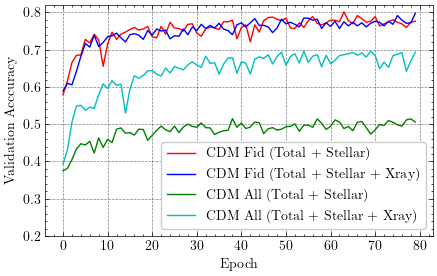

In [3]:
#models = [ model,  two_channel_model, two_channel_xr_model, three_channel_model, correlation_model, correlation_model_w_stellar]
plt.figure(figsize=(5,3))
plt.xlabel('Epoch')
plt.ylabel('Validation Acccuracy')
histories = pkl.load(open("pickles/test_baryon.pkl","rb"))
c = ['r','b','g','c']
names = ['CDM Fid (Total + Stellar)', 'CDM Fid (Total + Stellar + Xray)', \
         'CDM All (Total + Stellar)', 'CDM All (Total + Stellar + Xray)']
for i, iModel in enumerate(histories):
    plt.plot(np.arange(len(iModel['val_accuracy'])), iModel['val_accuracy'], label=names[i], c=c[i])
    #plt.plot(iModel.history.epoch, [np.max(iModel.history.history['val_accuracy'])]*len(iModel.history.epoch), c=c[i])
    #print(np.max(iModel.history.history['val_accuracy']))

plt.legend(loc=4)
plt.ylim(0.2,0.82)
plt.savefig("../plots/baryons_test.pdf")

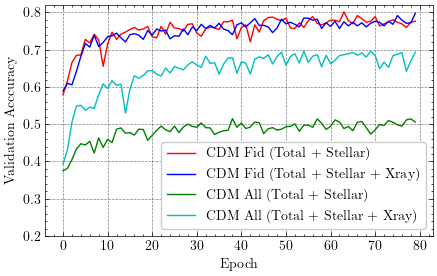

In [4]:
#models = [ model,  two_channel_model, two_channel_xr_model, three_channel_model, correlation_model, correlation_model_w_stellar]
plt.figure(figsize=(5,3))
plt.xlabel('Epoch')
plt.ylabel('Validation Acccuracy')
histories = pkl.load(open("pickles/test_baryon.pkl","rb"))
c = ['r','b','g','c']
names = ['CDM Fid (Total + Stellar)', 'CDM Fid (Total + Stellar + Xray)', \
         'CDM All (Total + Stellar)', 'CDM All (Total + Stellar + Xray)']
for i, iModel in enumerate(histories):
    plt.plot(np.arange(len(iModel['val_accuracy'])), iModel['val_accuracy'], label=names[i], c=c[i])
    #plt.plot(iModel.history.epoch, [np.max(iModel.history.history['val_accuracy'])]*len(iModel.history.epoch), c=c[i])
    #print(np.max(iModel.history.history['val_accuracy']))

    plt.legend(loc=4)
    plt.ylim(0.2,0.82)
    plt.savefig("../plots/baryons_test_%i.pdf" %i)

In [ ]:
train, test = getGenerators(augment_data=True, simulationNames=['CDM_low','CDM','CDM_hi','SIDM0.1','SIDM1'], 
                                                      channels=['total','stellar'], 
                                                      allDataFile='pickles/binned_data_20.pkl')
y_pred = predict( test[0], [all_cdm_plus_dm] )


In [ ]:
train_three_channel, test_three_chanel = getGenerators(augment_data=True, simulationNames=['CDM_low','CDM','CDM_hi','SIDM0.1','SIDM1'], 
                                                      channels=['total','stellar','xray'], 
                                                      allDataFile='pickles/binned_data_20.pkl')
y_pred_three_channel = predict( test_three_chanel[0], [all_cdm_plus_dm_3_channels] )


In [88]:
axarr[0].transAxes

/Users/davidharvey/Work/darkCNN/examples/tools.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, size = 15)
/Users/davidharvey/Work/darkCNN/examples/tools.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  for j in range(len(cm)):
/Users/davidharvey/Work/darkCNN/examples/tools.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, size = 15)
/Users/davidharvey/Work/darkCNN/examples/tools.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  (j,i),horizontalalignment='center',verticalalignment='center',size=15,color='black')


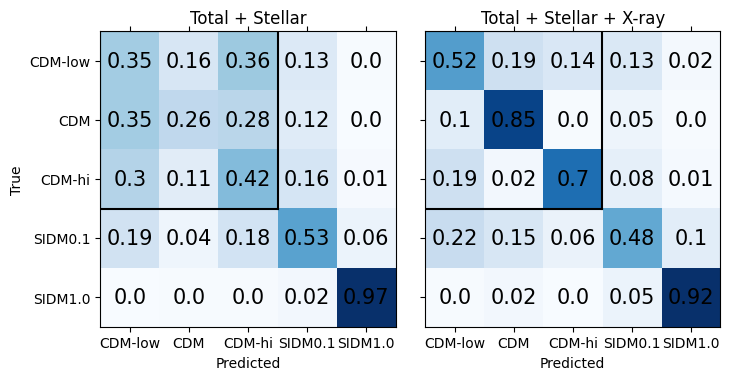

In [117]:
fig, axarr = plt.subplots( 1,2, figsize=(8,5))
fig.subplots_adjust(wspace=0.1)
plot_confusion_matrix( test[1], y_pred, labels=['CDM-low','CDM','CDM-hi','SIDM0.1','SIDM1.0'], 
                      ax=axarr[0], cbar=False)
plot_confusion_matrix( test_three_chanel[1], y_pred_three_channel, 
                      labels=['CDM-low','CDM','CDM-hi','SIDM0.1','SIDM1.0'],
                      ax=axarr[1], ylabel=False, cbar=False )
title = axarr[0].set_title('Total + Stellar')
title = axarr[1].set_title('Total + Stellar + X-ray')
for i in axarr:
    #i.fill_between([-0.5,2.5],[-0.5,-0.5],[2.5,2.5],color='grey',alpha=0.2)
    i.plot([-0.5,2.5],[-0.5,-0.5],'k-')
    i.plot([-0.5,2.5],[2.5,2.5],'k-')
    i.plot([-0.5,-0.5],[-0.5,2.5],'k-')
    i.plot([2.5,2.5],[-0.5,2.5],'k-')
plt.savefig("../plots/baryonic_confusion.pdf")

#### Can it determine the baryonic model from SIDM?

In [29]:

epochs = 80
train, test = getGenerators(augment_data=True, simulationNames=['CDM_low','CDM','CDM_hi'], 
                                                      channels=['xray'], 
                                                      allDataFile='pickles/binned_data_20.pkl', data_labels=[0,1,2])
num_classes = len(np.unique(test[1]))
all_cdm_xray_only = simpleCNN.getModel_ds(num_classes)
history = all_cdm_xray_only.fit(
  x=train,
  validation_data=test,
  epochs=epochs
)

Epoch 1/80
90/90 [==============================] - 7s 75ms/step - loss: 0.9981 - accuracy: 0.4927 - val_loss: 0.9713 - val_accuracy: 0.5125
Epoch 2/80
90/90 [==============================] - 6s 71ms/step - loss: 0.8976 - accuracy: 0.5705 - val_loss: 0.8900 - val_accuracy: 0.5583
Epoch 3/80
90/90 [==============================] - 6s 64ms/step - loss: 0.8151 - accuracy: 0.6087 - val_loss: 0.8290 - val_accuracy: 0.6194
Epoch 4/80
90/90 [==============================] - 7s 72ms/step - loss: 0.7760 - accuracy: 0.6396 - val_loss: 0.7915 - val_accuracy: 0.6361
Epoch 5/80
90/90 [==============================] - 6s 71ms/step - loss: 0.7581 - accuracy: 0.6493 - val_loss: 0.7805 - val_accuracy: 0.6444
Epoch 6/80
90/90 [==============================] - 6s 64ms/step - loss: 0.7524 - accuracy: 0.6559 - val_loss: 0.7562 - val_accuracy: 0.6556
Epoch 7/80
90/90 [==============================] - 6s 65ms/step - loss: 0.7471 - accuracy: 0.6712 - val_loss: 0.7863 - val_accuracy: 0.6389
Epoch 8/80
90

In [27]:
train, test = getGenerators(augment_data=True, simulationNames=['SIDM0.1'], 
                                                      channels=['xray'], 
                                                      allDataFile='pickles/binned_data_20.pkl',train_split=0.01)
predictions = all_cdm_xray_only.predict( test[0] )

38/38 [==============================] - 1s 15ms/step


# After this is experimental - not needed for the paper

#### Combine models 1 + 4

In [ ]:
from simpleCNN_combined_model import getCombinedModel, getModel
from getSIDMdata_double_input import get_tf_DataSet as double_input_data

In [ ]:
input_generator, val_data, steps_per_epoch = double_input_data(augment_data=True, simulationNames=['CDM_low','CDM_hi','CDM','SIDM0.1','SIDM1'], 
                                                      channels=[['total','stellar','xray'],['total','stellar']], 
                                                      allDataFile='pickles/binned_data_20.pkl')
nclasses = len(np.unique(test_data[1]))

In [ ]:
list_of_input_shapes = [ i.shape[1:] for i in val_data[0] ]


In [ ]:
all_baryon_layers = all_cdm_3_channel.layers[0].layers + all_cdm_3_channel.layers[1].layers
all_dm_layers = fiducial_model.layers[0].layers + fiducial_model.layers[1].layers

In [ ]:
list_of_output_shapes = [ all_baryon_layers[-1].output_shape[1:][0], all_dm_layers[-1].output_shape[1:][0] ]

In [ ]:
model = getCombinedModel(list_of_input_shapes, list_of_output_shapes, nclasses)

In [ ]:
for iLayer in range(len(all_baryon_layers)):
    this_layer = (1 + iLayer ) *2

    model.layers[this_layer] =  all_baryon_layers[iLayer]
    model.layers[this_layer].set_weights(  all_baryon_layers[iLayer].get_weights() )
    model.layers[this_layer].trainable = False
    
    
    model.layers[this_layer+1] =  all_dm_layers[iLayer]
    model.layers[this_layer+1].set_weights( all_dm_layers[iLayer].get_weights() )
    model.layers[this_layer+1].trainable = False

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
model_history = model.fit( input_generator, validation_data=val_data, epochs=epochs, steps_per_epoch=steps_per_epoch) 

In [ ]:
model_history = model.fit( input_generator, validation_data=val_data, epochs=epochs, steps_per_epoch=steps_per_epoch) 

In [ ]:
y_pred = predict( val_data[0], [model] )
plot_confusion_matrix( val_data[1], y_pred)

In [ ]:
y_pred = predict( test[0], [all_cdm_plus_dm_3_channel] )
plot_confusion_matrix( test[1], y_pred)

### What happens when I get the baryons wrong with no xray (confusion matrices)?

In [ ]:
epochs=100
baryon_models = ['CDM_hi', 'CDM_low','CDM']

all_models = []
all_history = []

for iB_model in baryon_models:

    train_baryons, test_baryons = getGenerators(augment_data=True, simulationNames=[iB_model]+['SIDM0.1'], 
                                                      channels=['total','stellar'], 
                                                        allDataFile='pickles/binned_data_20.pkl', train_split=0.85)
    num_classes = len(np.unique(test_baryons[1]))
    this_model = simpleCNN.getModel_ds(num_classes)
    history = this_model.fit(
      x=train_baryons,
      validation_data=test_baryons,
      epochs=epochs, verbose=0
    )
    all_history.append(history)
    all_models.append(this_model)
    
    for jB, jB_model in enumerate(baryon_models):
        if jB_model == iB_model:
            test = test_baryons
        else:
            train_cdm_hi, test = getGenerators(augment_data=True, simulationNames=[jB_model]+['SIDM0.1','SIDM1'], 
                                                      channels=['total','stellar'], 
                                                        allDataFile='pickles/binned_data_20.pkl', train_split=0.01) 
        
        y_pred = predict( test[0], [this_model])
        plot_confusion_matrix( test[1], y_pred, title='Trained on %s - tested on %s' % (iB_model, jB_model))

In [ ]:
for i in all_history:
    plt.plot(i.history['val_accuracy'])

### What happens when I get the baryons wrong with xray?

In [ ]:
epochs=100
baryon_models = ['CDM_hi', 'CDM_low','CDM']

all_models = []
all_history = []

for iB_model in baryon_models:

    train_baryons, test_baryons = getGenerators(augment_data=True, simulationNames=[iB_model]+['SIDM0.1','SIDM1'], 
                                                      channels=['total','stellar','xray'], 
                                                        allDataFile='pickles/binned_data_20.pkl')
    num_classes = len(np.unique(test[1]))
    this_model = simpleCNN.getModel_ds(num_classes)
    history = this_model.fit(
      x=train_baryons,
      validation_data=test_baryons,
      epochs=epochs, verbose=0
    )
    all_history.append(history)
    all_models.append(this_model)
    
    for jB, jB_model in enumerate(baryon_models):
        if jB_model == iB_model:
            test = test_baryons
        else:
            train_cdm_hi, test = getGenerators(augment_data=True, simulationNames=[jB_model]+['SIDM0.1','SIDM1'], 
                                                      channels=['total','stellar','xray'], 
                                                        allDataFile='pickles/binned_data_20.pkl', train_split=0.01) 
        
        y_pred = predict( test[0], [this_model])
        plot_confusion_matrix( test[1], y_pred, title='Trained on %s - tested on %s' % (iB_model, jB_model))

### What happens if i train on CDM_X + DM and the Universe is CDM_Y? Evaluate CDM_Y to a matrix.

In [ ]:
sum(predict( test[0], [all_models[iB]] ) == 0)

In [ ]:
baryon_models = ['CDM_hi', 'CDM_low','CDM']
evaluation = np.zeros((len(baryon_models),len(baryon_models)))
for iB, iB_model in enumerate(baryon_models):
    for jB, jB_model in enumerate(baryon_models):
        if jB_model == iB_model:
            val_split = 0.85 # Because i cant use the same information in the test than in the train.
        else:
            val_split = 0.01

        train_cdm_hi, test = getGenerators(augment_data=True, simulationNames=[jB_model], 
                                                      channels=['total','stellar'], 
                                                        allDataFile='pickles/binned_data_20.pkl', train_split=val_split) 
    
            
            
        evaluation[iB, jB] = sum(predict( test[0], [all_models[iB]] )==0)/len(test[0])

In [ ]:
ax = plt.gca()
im = ax.imshow(evaluation, origin='lower')
ax.set_xticks( np.arange(len(baryon_models)))
ax.set_yticks( np.arange(len(baryon_models)))

ax.set_xticklabels(baryon_models)
ax.set_yticklabels(baryon_models)
plt.ylabel('Trained', size = 20)
plt.xlabel('Tested', size = 20)
for i in range(len(evaluation)):
    for j in range(len(evaluation)):
        plt.annotate(round(evaluation[i,j],2),xy=\
                    (j,i),horizontalalignment='center',verticalalignment='center',size=15,color='black')
plt.colorbar(im)

### What happens if i train on CDM_BARYONS_X + DM and the Universe is DM+BARYONS_Y? Evaluate CDM_Y to a matrix.

In [ ]:
baryon_models = ['CDM_hi', 'CDM_low','CDM']
dm_evaluation = np.zeros((len(baryon_models),len(baryon_models)))
for iB, iB_model in enumerate(baryon_models):
    
        train_cdm_hi, test = getGenerators(augment_data=True, simulationNames=['SIDM0.1'], 
                                                      channels=['total','stellar'], 
                                                        allDataFile='pickles/binned_data_20.pkl', train_split=0.01) 
    
            
            
        dm_evaluation[iB, 0] = sum(predict( test[0], [all_models[iB]] )==1)/len(test[0])


In [ ]:
ax = plt.gca()
im = ax.imshow(dm_evaluation, origin='lower')
ax.set_xticks( np.arange(len(baryon_models)))
ax.set_yticks( np.arange(len(baryon_models)))

ax.set_xticklabels(baryon_models)
ax.set_yticklabels(baryon_models)
plt.ylabel('Trained', size = 20)
plt.xlabel('Tested', size = 20)
for i in range(len(evaluation)):
    for j in range(len(evaluation)):
        plt.annotate(round(dm_evaluation[i,j],2),xy=\
                    (j,i),horizontalalignment='center',verticalalignment='center',size=15,color='black')
plt.colorbar(im)